In [1]:
# from scipy import signal, fftpack
# import numpy
# a = numpy.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
# b = numpy.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])
# numpy.argmax(signal.correlate(a,b)),numpy.argmax(signal.correlate(b,a))

In [2]:
# signal.correlate(a,b),signal.correlate(b,a)

In [3]:
# import scipy
# af = scipy.fft(a)
# bf = scipy.fft(b)
# c = scipy.ifft(af * scipy.conj(bf))

# time_shift = numpy.argmax(abs(c))
# time_shift

In [178]:
import pandas as pd
import numpy as np
import lasio
import os
%matplotlib inline

import matplotlib
from helper import *
# matplotlib.use('Agg')
import matplotlib.pyplot as plt 

folder=r'D:\Ameyem Office\Projects\Cairn\W1\LAS\\'
files=os.listdir(folder)[:]
las=lasio.read(folder+files[3])
dcol=las.keys()[find_depth_indx(las)]
df=las.df().sort_values([dcol])
las.set_data(df)
np.array(las.keys())

array(['DEPT', 'ROP5_RM', 'GR_ARC', 'A16H', 'A22H', 'A28H', 'A34H', 'A40H',
       'P16H', 'P22H', 'P28H', 'P34H', 'P40H', 'A16L', 'A22L', 'A28L',
       'A34L', 'A40L', 'P16L', 'P22L', 'P28L', 'P34L', 'P40L', 'ECD_ARC',
       'APRS_ARC', 'ATMP', 'RHOB', 'ROBB', 'DRHO', 'DRHB', 'DCHO', 'DCVE',
       'DCAV', 'TNPH', 'VERD', 'HORD'], 
      dtype='<U8')

In [195]:



# line.set_dashes([8, 4, 2, 4, 2, 4])

# Calculate lag position of maximal correlation
def lag_ix(x,y,corrtype='+ve',dist2look=50):

    fullcorr = np.correlate(x,y,mode='full')
    halflen=round((fullcorr.size-1)/2)
    corr=fullcorr[halflen-dist2look:halflen+dist2look]
#     corr=fullcorr
    if corrtype=='+ve':
        pos_ix = np.argmax( corr) 
    elif corrtype=='-ve':
        pos_ix = np.argmin( corr)
    else:
        pos_ix = np.argmax( np.abs(corr) )
    lag_ix = pos_ix - (corr.size-1)/2
    return lag_ix
#     return halflen-dist2look+lag_ix
def get_delay(A,B,corrtype='+ve'):
    timea=np.arange(0,len(A))
    timeb=np.arange(0,len(B))
    # compute cross correlation

    coor = np.correlate(A, B, 'full')
    maxlag = (coor.size-1)/2 
    lag = np.arange(-maxlag, maxlag+1)*dt
    fig,ax=plt.subplots(nrows=3, ncols=1, figsize=(18,8))
    # plot cross correlogram with line about 1 ms
    ax[0].plot(timea, A, lw=1, color = 'magenta');
    ax[0].plot(timeb, B, lw=1, color = 'blue');
    ax[0].set_xlabel('Time (ms)');
    ax[0].set_ylabel('Signal (AU)');

    ax[1].plot(lag, coor)
    
#     np.min(coor),np.max(coor),-delay
    delay_estimation = -lag_ix(A,B,corrtype=corrtype)*dt
    line = ax[1].axvline(x=-delay_estimation, ymin=np.min(coor), ymax = np.max(coor), linewidth=1.5, color='c')
    print('delay: {} and delay index: {}'.format(delay_estimation,delay_estimation/dt))
    # timea=np.arange(0,len(A))
    timeb_s=timeb-delay_estimation
    plt.plot(timea, A, lw=1, color = 'magenta');
    plt.plot(timeb_s, B, lw=1, color = 'blue');
    plt.xlabel('Time (ms)');
    plt.ylabel('Signal (AU)');

delay: -8.5 and delay index: -8.5


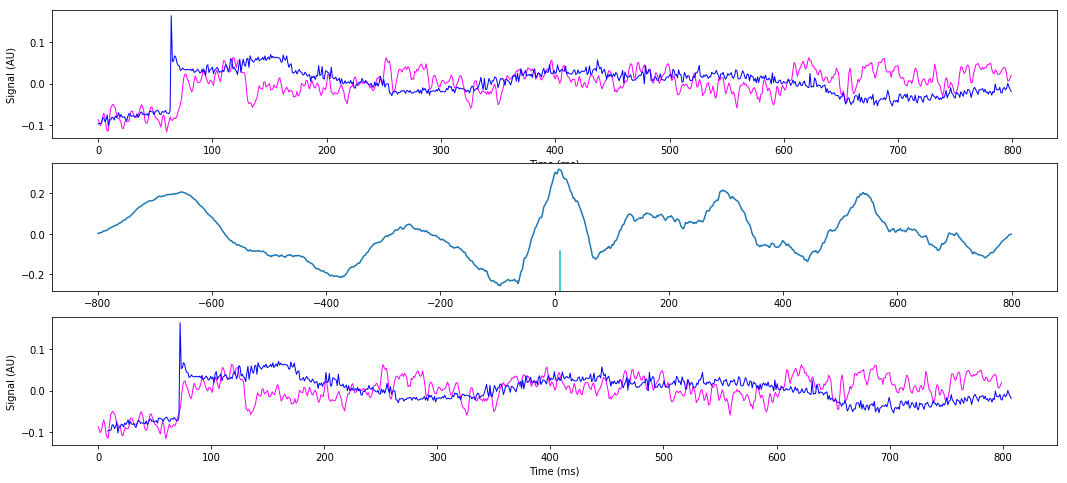

In [200]:
# l=LogPlot(2,vert_size=20)
# l.basicPlot(l.ax,depth,prop,lcolor='#800000')
['DEPT', 'ROP5_RM', 'GR_ARC', 'A16H', 'A22H', 'A28H', 'A34H', 'A40H',
       'P16H', 'P22H', 'P28H', 'P34H', 'P40H', 'A16L', 'A22L', 'A28L',
       'A34L', 'A40L', 'P16L', 'P22L', 'P28L', 'P34L', 'P40L', 'ECD_ARC',
       'APRS_ARC', 'ATMP', 'RHOB', 'ROBB', 'DRHO', 'DRHB', 'DCHO', 'DCVE',
       'DCAV', 'TNPH', 'VERD', 'HORD']
['DEPT', 'TICK_ARC_GR', 'TICK_ARC_RES', 'ROP5_RM', 'GR_ARC',
       'TAB_ARC_RES', 'A16H', 'A22H', 'A28H', 'A34H', 'A40H', 'A16L',
       'A22L', 'A28L', 'A34L', 'A40L', 'P16H', 'P22H', 'P28H', 'P34H',
       'P40H', 'P16L', 'P22L', 'P28L', 'P34L', 'P40L', 'ECD_ARC',
       'APRS_ARC', 'ATMP']
depth_col=str_array2floats(las[dcol])
log_col=str_array2floats(las['GR_ARC'])    
log_col2=str_array2floats(las['ECD_ARC'])
# l.basicPlot(l.ax[0],depth_col[0:400],log_col[0:400],lcolor='#800000')
# l.basicPlot(l.ax[1],depth_col[0:100],log_col[0:100],lcolor='#700000')
# l.las_plot(las,(['ECD_ARC']))



def mean_norm(A):
    A=A-np.mean(A)
    return A/np.linalg.norm(A)
delay=300
# startsmaple=90
nsamples=60
a=log_col[0:800]
A=mean_norm(a)

# B=A[delay:delay+nsamples]

# b=log_col[200:600]
b=log_col2[0:800]
B=mean_norm(b)[0:800]


x = np.empty(len(A)-len(B))
# a[:] = np.nan
# a=np.random.normal(loc=0.0, scale=0.002, size=len(A)-len(B))
x[:]=0
B=np.append(B,x)
get_delay(A,B,corrtype='abs')

(array([  1.,   2.,   2.,   4.,  10.,  10.,  11.,   6.,   2.,   2.]),
 array([-0.29262079, -0.24429946, -0.19597813, -0.14765681, -0.09933548,
        -0.05101416, -0.00269283,  0.0456285 ,  0.09394982,  0.14227115,
         0.19059248]),
 <a list of 10 Patch objects>)

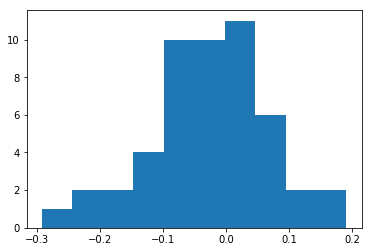

In [112]:
a=np.random.normal(loc=0.0, scale=0.1, size=50)
plt.hist(a)

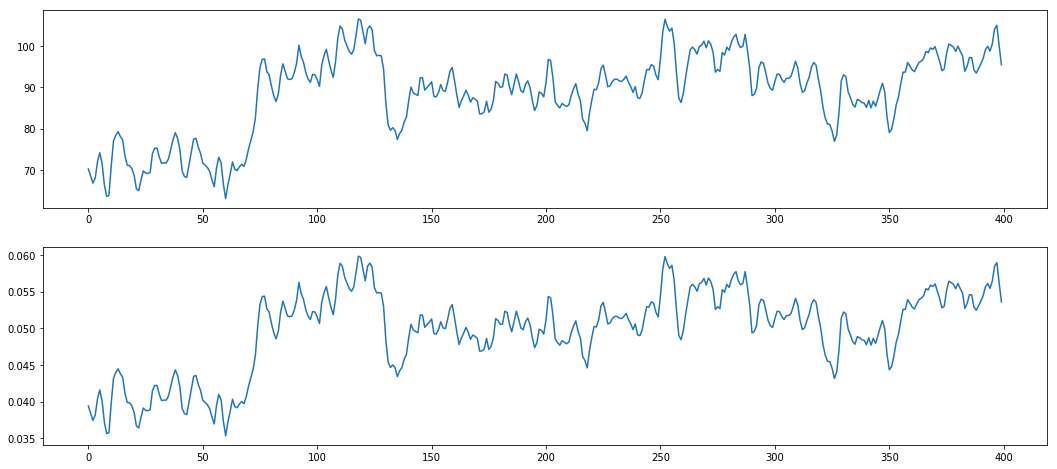

In [90]:
# # compute signal autocorrelation
# dt = 1 # sampling interval (in ms)
# coor = np.correlate(A, A, 'full')
# maxlag = coor.size/2

# lag = np.arange(-maxlag+1, maxlag+1)*dt

# plt.plot(lag, coor, lw=1);
# line = plt.axvline(x=0, ymin=-40, ymax = 50, linewidth=1.5, color='r')
# line.set_dashes([8, 4, 2, 4, 2, 4])
A=log_col[0:400]
# A=A-np.mean(A)
A,A/np.linalg.norm(A)
fig,ax=plt.subplots(nrows=2, ncols=1, figsize=(18,8))
ax[0].plot(A)
ax[1].plot(A/np.linalg.norm(A))

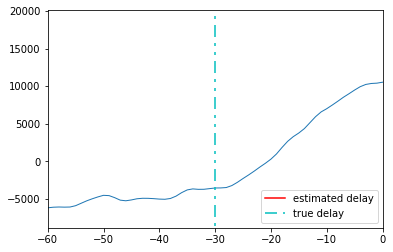

In [59]:
plt.plot(lag, coor, lw=1);
ymin=np.min(coor)
ymax=np.max(coor)
line = plt.axvline(x=-delay_estimation, ymin=ymin, ymax =ymax,
                    color='r', label='estimated delay')
line = plt.axvline(x=-delay, ymin=ymin, ymax = ymax,
                   linewidth=1.5, color='c', label='true delay')

line.set_dashes([8, 4, 2, 4, 2, 4]) 
plt.xlim(-2*delay, 0)

plt.legend(loc='lower right');